# CAP-406 notebook to create the MIRI MRS dither patterns #

The purpose of this notebook is to create the MIRI MRS dither patterns from a given set of MRS distortion files using a series of pre-defined algorithms that account for along-slice and across-slice nominal spacing.  It will read in the new distortion files, compute the relevant pixel/slice sizes and field boundaries, and then make each of the point-source and extended source patterns for all 12 MRS bands.

The actual work of calculating the dither patterns is done in the associated python code makedither_mrs.makepattern_ch1() (and etc).  The majority of this notebook is dedicated to rendering various informational plots about what the new dither patterns look like compared to the most recently archived dither patterns (which are included in the miricoord package for reference).

The final outputs of this CAP are the plots below (which are used in numerous JDox documentation articles) along with three different dither files: one formatted for the JWST PRD (i.e., to be delivered for flight operations), one formatted for mirisim (i.e., to be delivered to the MIRI instrument simulator), and one with additional details that can be included in a miricoord data directory for future reference and comparison.

In [1]:
import os as os
import numpy as np
import datetime
from astropy.io import ascii
from numpy.testing import assert_allclose
import pdb as pdb

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import miricoord.mrs.mrs_tools as mrst
import miricoord.mrs.makedither.makedither_mrs as mrsd
import miricoord.mrs.makesiaf.makesiaf_mrs as makesiaf

In [2]:
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

### Output Files ###
Output will be written to $MIRICOORD_DATA_DIR/dithers/temp/ by default

In [3]:
# Look for if the default base output directory (MIRICOORD_DATA_DIR)
# was defined already.  If you're using the MIRI Box repository, you might have something
# in your .cshrc or .bashrc such as:
# setenv MIRIBOX ~/Box/MIRI-COMM/MIRI-COMM-Team
# setenv MIRI3D_DATA_DIR $MIRIBOX/Sandbox/dlaw/miri3d_data_dir/

# If the default output directory isn't set by these paths, just use the local directory
if "MIRICOORD_DATA_DIR" in os.environ:
    data_dir=os.getenv('MIRICOORD_DATA_DIR')+'dithers/temp/'
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
else:
    data_dir='./'

In [4]:
now=datetime.datetime.now()
nowstring=now.ctime()
nowstring=nowstring[4:8]+nowstring[20:24]

### Previous Dither File ###
Read in the previous set of dithers from the data directory within miricoord.  Note that code required here might change as the old format is updated.

In [5]:
prevfile=os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))),'data/dithers/mrsdither-PRDOPSSOC-M-025.txt')

In [6]:
data=ascii.read(prevfile)
v2_old,v3_old=data['v2'].data,data['v3'].data
v2_old_ch1,v3_old_ch1=v2_old[0:8],v3_old[0:8]
v2_old_ch2,v3_old_ch2=v2_old[8:16],v3_old[8:16]
v2_old_ch3,v3_old_ch3=v2_old[16:24],v3_old[16:24]
v2_old_ch4,v3_old_ch4=v2_old[24:32],v3_old[24:32]
v2_old_eall,v3_old_eall=v2_old[32:36],v3_old[32:36]
v2_old_ech1,v3_old_ech1=v2_old[36:40],v3_old[36:40]
v2_old_ech2,v3_old_ech2=v2_old[40:44],v3_old[40:44]
v2_old_ech3,v3_old_ech3=v2_old[44:48],v3_old[44:48]
v2_old_ech4,v3_old_ech4=v2_old[48:52],v3_old[48:52]

### Use CDP-8b distortion solution (change this if necessary to use a different one) ###

In [7]:
mrst.set_toolversion('cdp8b')
mrst.version()

'cdp8b'

In [8]:
# Define the field boundaries used by the SIAF
# We create all of this anew instead of simply reading the SIAF because
# sometimes it takes a long time to get the SIAF PRD updated
siaf1A=makesiaf.create_siaf_oneband('1A')
siaf1B=makesiaf.create_siaf_oneband('1B')
siaf1C=makesiaf.create_siaf_oneband('1C')

siaf2A=makesiaf.create_siaf_oneband('2A')
siaf2B=makesiaf.create_siaf_oneband('2B')
siaf2C=makesiaf.create_siaf_oneband('2C')

siaf3A=makesiaf.create_siaf_oneband('3A')
siaf3B=makesiaf.create_siaf_oneband('3B')
siaf3C=makesiaf.create_siaf_oneband('3C')

siaf4A=makesiaf.create_siaf_oneband('4A')
siaf4B=makesiaf.create_siaf_oneband('4B')
siaf4C=makesiaf.create_siaf_oneband('4C')

### Calculate actual pixel sizes and slice widths ###

In [9]:
# This sets the pixel and slice sizes in a GLOBAL variable
mrsd.setsizes(verbose=1)

Slice widths:  [0.17721014 0.27971819 0.38981378 0.65603803]
Pixel sizes:  [0.19058661 0.19448411 0.25188681 0.26938074]


### Ch1 point-source dithers ###

In [10]:
v2_ch1,v3_ch1=mrsd.makepattern_ch1(siaf1A,siaf1B,siaf1C)

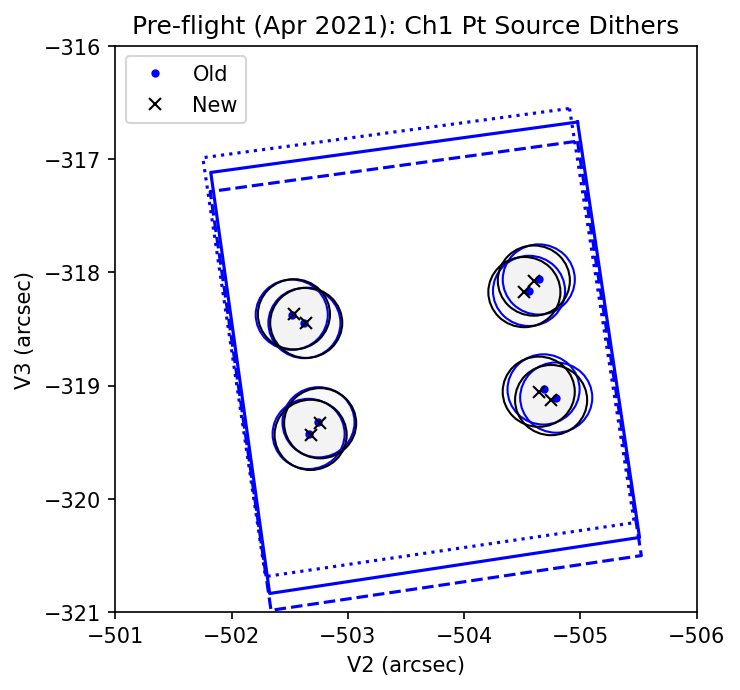

In [11]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()
plt.xlim(-501,-506)
plt.ylim(-321,-316)
plt.xlabel('V2 (arcsec)')
plt.ylabel('V3 (arcsec)')
    
plt.plot(v2_old_ch1,v3_old_ch1,'.',color='b',label='Old')
for i in range(0,v2_old_ch1.size):
    circle1 = mpl.patches.Circle((v2_old_ch1[i], v3_old_ch1[i]), mrsd.maxfwhm(1),linewidth=1,edgecolor='b', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)    

plt.plot(v2_ch1,v3_ch1,'x',color='black',label='New')
for i in range(0,v2_ch1.size):
    circle1 = mpl.patches.Circle((v2_ch1[i], v3_ch1[i]), mrsd.maxfwhm(1),linewidth=1,edgecolor='black', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)

plt.plot(siaf1A['inscr_v2_corners'],siaf1A['inscr_v3_corners'],color='b',linewidth=1.5)
plt.plot(siaf1B['inscr_v2_corners'],siaf1B['inscr_v3_corners'],'--',color='b',linewidth=1.5)
plt.plot(siaf1C['inscr_v2_corners'],siaf1C['inscr_v3_corners'],':',color='b',linewidth=1.5)
plt.title('Pre-flight ('+nowstring+'): Ch1 Pt Source Dithers')
plt.legend()

In [12]:
# Test that they didn't change too much
diff = np.sqrt((v2_ch1-v2_old_ch1)**2 + (v3_ch1-v3_old_ch1)**2)
if (np.max(diff) > 0.3):
    printmd('**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?', color="red")
else:
    printmd('**Looks OK!**', color="green")

<span style='color:green'>**Looks OK!**</span>

### Ch2 point-source dithers ###

In [13]:
v2_ch2,v3_ch2=mrsd.makepattern_ch2(siaf2A,siaf2B,siaf2C)

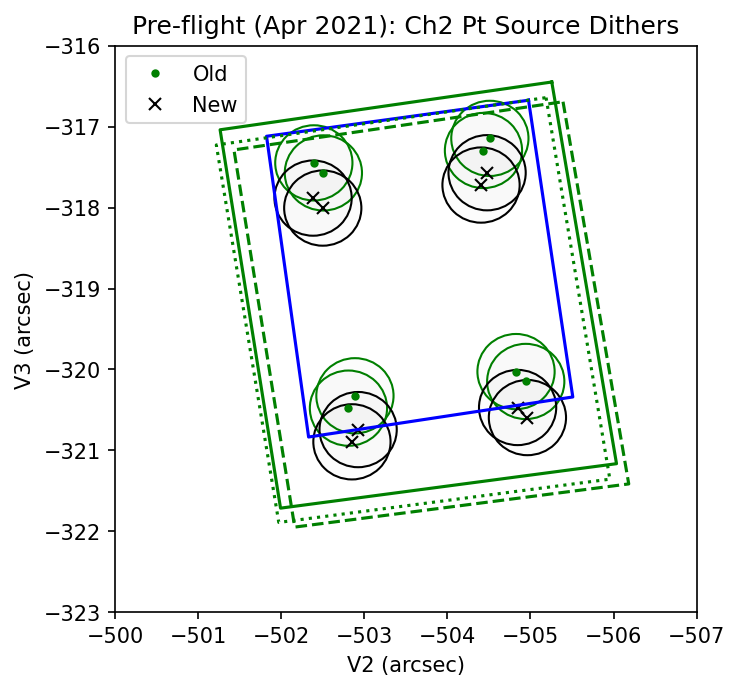

In [14]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()

plt.xlim(-500,-507)
plt.ylim(-323,-316)
plt.xlabel('V2 (arcsec)')
plt.ylabel('V3 (arcsec)')

plt.plot(v2_old_ch2,v3_old_ch2,'.',color='g',label='Old')
for i in range(0,v2_old_ch2.size):
    circle1 = mpl.patches.Circle((v2_old_ch2[i], v3_old_ch2[i]), mrsd.maxfwhm(2),linewidth=1,edgecolor='g', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)    

plt.plot(v2_ch2,v3_ch2,'x',color='black',label='New')
for i in range(0,v2_ch2.size):
    circle1 = mpl.patches.Circle((v2_ch2[i], v3_ch2[i]), mrsd.maxfwhm(2),linewidth=1,edgecolor='black', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)  
    
plt.plot(siaf1A['inscr_v2_corners'],siaf1A['inscr_v3_corners'],color='b',linewidth=1.5)
plt.plot(siaf2A['inscr_v2_corners'],siaf2A['inscr_v3_corners'],color='g',linewidth=1.5)
plt.plot(siaf2B['inscr_v2_corners'],siaf2B['inscr_v3_corners'],'--',color='g',linewidth=1.5)
plt.plot(siaf2C['inscr_v2_corners'],siaf2C['inscr_v3_corners'],':',color='g',linewidth=1.5)
plt.title('Pre-flight ('+nowstring+'): Ch2 Pt Source Dithers')
plt.legend()

In [15]:
# Test that they didn't change too much
diff = np.sqrt((v2_ch2-v2_old_ch2)**2 + (v3_ch2-v3_old_ch2)**2)
if (np.max(diff) > 0.3):
    printmd('**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?', color="red")
else:
    printmd('**Looks OK!**', color="green")

<span style='color:red'>**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?</span>

### Ch3 point-source dithers ###

In [16]:
v2_ch3,v3_ch3=mrsd.makepattern_ch3(siaf3A,siaf3B,siaf3C)

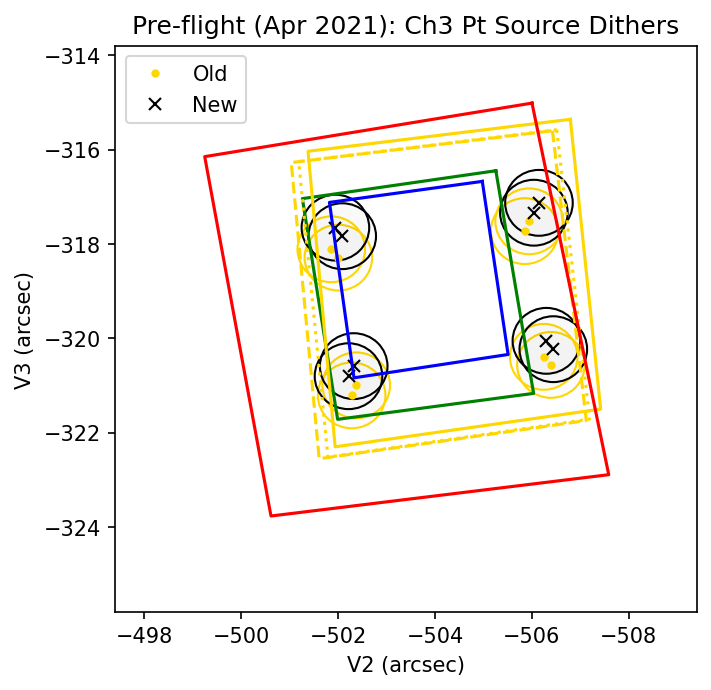

In [17]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()

plt.xlim(-497.4,-509.4)
plt.ylim(-325.8,-313.8)
plt.xlabel('V2 (arcsec)')
plt.ylabel('V3 (arcsec)')

plt.plot(v2_old_ch3,v3_old_ch3,'.',color='gold',label='Old')
for i in range(0,v2_old_ch3.size):
    circle1 = mpl.patches.Circle((v2_old_ch3[i], v3_old_ch3[i]), mrsd.maxfwhm(3),linewidth=1,edgecolor='gold', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)    

plt.plot(v2_ch3,v3_ch3,'x',color='black',label='New')
for i in range(0,v2_ch3.size):
    circle1 = mpl.patches.Circle((v2_ch3[i], v3_ch3[i]), mrsd.maxfwhm(3),linewidth=1,edgecolor='black', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)  
    
plt.plot(siaf1A['inscr_v2_corners'],siaf1A['inscr_v3_corners'],color='b',linewidth=1.5)
plt.plot(siaf2A['inscr_v2_corners'],siaf2A['inscr_v3_corners'],color='g',linewidth=1.5)
plt.plot(siaf3A['inscr_v2_corners'],siaf3A['inscr_v3_corners'],color='gold',linewidth=1.5)
plt.plot(siaf3B['inscr_v2_corners'],siaf3B['inscr_v3_corners'],'--',color='gold',linewidth=1.5)
plt.plot(siaf3C['inscr_v2_corners'],siaf3C['inscr_v3_corners'],':',color='gold',linewidth=1.5)
plt.plot(siaf4A['inscr_v2_corners'],siaf4A['inscr_v3_corners'],color='r',linewidth=1.5)
plt.title('Pre-flight ('+nowstring+'): Ch3 Pt Source Dithers')
plt.legend()

In [18]:
# Test that they didn't change too much
diff = np.sqrt((v2_ch3-v2_old_ch3)**2 + (v3_ch3-v3_old_ch3)**2)
if (np.max(diff) > 0.3):
    printmd('**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?', color="red")
else:
    printmd('**Looks OK!**', color="green")

<span style='color:red'>**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?</span>

### Ch4 point-source dithers ###

In [19]:
v2_ch4,v3_ch4=mrsd.makepattern_ch4(siaf4A,siaf4B,siaf4C)

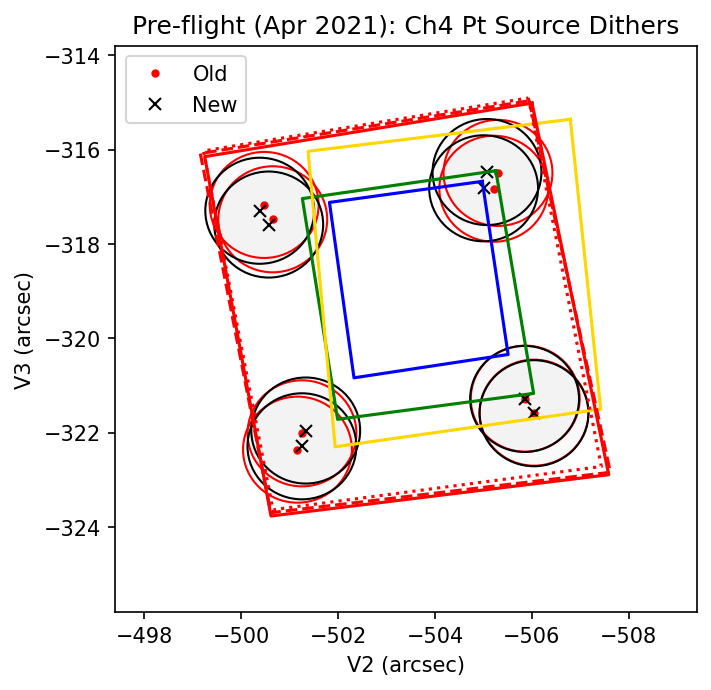

In [20]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()

plt.xlim(-497.4,-509.4)
plt.ylim(-325.8,-313.8)
plt.xlabel('V2 (arcsec)')
plt.ylabel('V3 (arcsec)')

plt.plot(v2_old_ch4,v3_old_ch4,'.',color='r',label='Old')
for i in range(0,v2_old_ch4.size):
    circle1 = mpl.patches.Circle((v2_old_ch4[i], v3_old_ch4[i]), mrsd.maxfwhm(4),linewidth=1,edgecolor='r', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)    

plt.plot(v2_ch4,v3_ch4,'x',color='black',label='New')
for i in range(0,v2_ch4.size):
    circle1 = mpl.patches.Circle((v2_ch4[i], v3_ch4[i]), mrsd.maxfwhm(4),linewidth=1,edgecolor='black', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)

plt.plot(siaf1A['inscr_v2_corners'],siaf1A['inscr_v3_corners'],color='b',linewidth=1.5)
plt.plot(siaf2A['inscr_v2_corners'],siaf2A['inscr_v3_corners'],color='g',linewidth=1.5)
plt.plot(siaf3A['inscr_v2_corners'],siaf3A['inscr_v3_corners'],color='gold',linewidth=1.5)
plt.plot(siaf4A['inscr_v2_corners'],siaf4A['inscr_v3_corners'],color='r',linewidth=1.5)
plt.plot(siaf4B['inscr_v2_corners'],siaf4B['inscr_v3_corners'],'--',color='r',linewidth=1.5)
plt.plot(siaf4C['inscr_v2_corners'],siaf4C['inscr_v3_corners'],':',color='r',linewidth=1.5)
plt.title('Pre-flight ('+nowstring+'): Ch4 Pt Source Dithers')
plt.legend()

In [21]:
# Test that they didn't change too much
diff = np.sqrt((v2_ch4-v2_old_ch4)**2 + (v3_ch4-v3_old_ch4)**2)
if (np.max(diff) > 0.3):
    printmd('**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?', color="red")
else:
    printmd('**Looks OK!**', color="green")

<span style='color:green'>**Looks OK!**</span>

### Make the extended source patterns ###

In [22]:
v2_ext_all,v3_ext_all=mrsd.makepattern_ext_all(siaf1A,siaf1B,siaf1C)
v2_ext_ch1,v3_ext_ch1=mrsd.makepattern_ext_ChX(v2_ch1,v3_ch1,siaf1A)
v2_ext_ch2,v3_ext_ch2=mrsd.makepattern_ext_ChX(v2_ch2,v3_ch2,siaf2A)
v2_ext_ch3,v3_ext_ch3=mrsd.makepattern_ext_ChX(v2_ch3,v3_ch3,siaf3A)
v2_ext_ch4,v3_ext_ch4=mrsd.makepattern_ext_ChX(v2_ch4,v3_ch4,siaf4A)

### Extended source ALL dithers ###

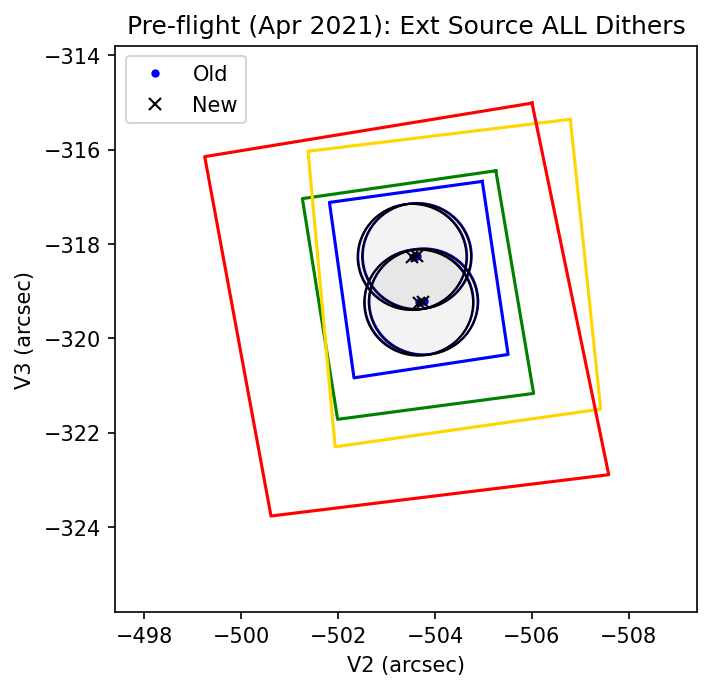

In [23]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()

plt.xlim(-497.4,-509.4)
plt.ylim(-325.8,-313.8)
plt.xlabel('V2 (arcsec)')
plt.ylabel('V3 (arcsec)')

plt.plot(v2_old_eall,v3_old_eall,'.',color='b',label='Old')
for i in range(0,v2_old_eall.size):
    circle1 = mpl.patches.Circle((v2_old_eall[i], v3_old_eall[i]), mrsd.maxfwhm(4),linewidth=1,edgecolor='b', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)    

plt.plot(v2_ext_all,v3_ext_all,'x',color='black',label='New')
for i in range(0,v2_ext_all.size):
    circle1 = mpl.patches.Circle((v2_ext_all[i], v3_ext_all[i]), mrsd.maxfwhm(4),linewidth=1,edgecolor='black', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)

plt.plot(siaf1A['inscr_v2_corners'],siaf1A['inscr_v3_corners'],color='b',linewidth=1.5)
plt.plot(siaf2A['inscr_v2_corners'],siaf2A['inscr_v3_corners'],color='g',linewidth=1.5)
plt.plot(siaf3A['inscr_v2_corners'],siaf3A['inscr_v3_corners'],color='gold',linewidth=1.5)
plt.plot(siaf4A['inscr_v2_corners'],siaf4A['inscr_v3_corners'],color='r',linewidth=1.5)
plt.title('Pre-flight ('+nowstring+'): Ext Source ALL Dithers')
plt.legend()

In [24]:
# Test that they didn't change too much
diff = np.sqrt((v2_ext_all-v2_old_eall)**2 + (v3_ext_all-v3_old_eall)**2)
if (np.max(diff) > 0.3):
    printmd('**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?', color="red")
else:
    printmd('**Looks OK!**', color="green")

<span style='color:green'>**Looks OK!**</span>

### Extended source Ch1 dithers ###

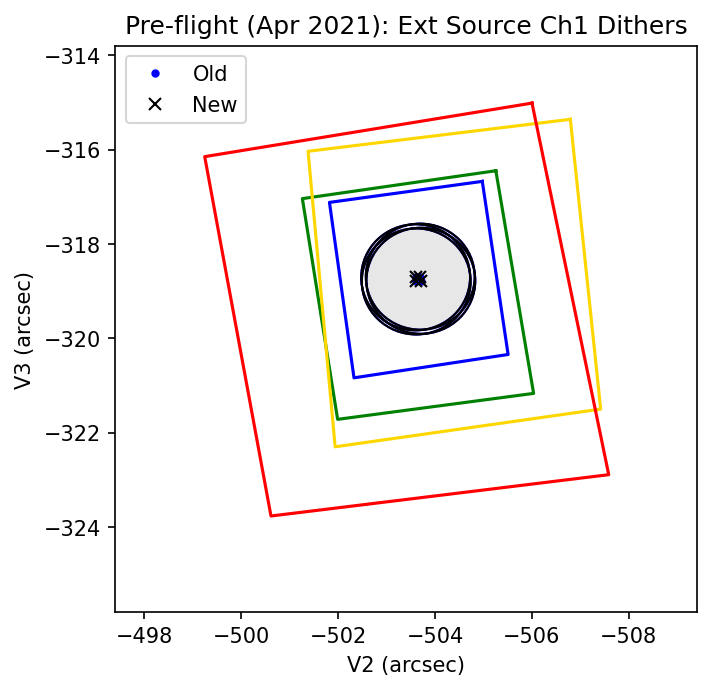

In [25]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()

plt.xlim(-497.4,-509.4)
plt.ylim(-325.8,-313.8)
plt.xlabel('V2 (arcsec)')
plt.ylabel('V3 (arcsec)')

plt.plot(v2_old_ech1,v3_old_ech1,'.',color='b',label='Old')
for i in range(0,v2_old_ech1.size):
    circle1 = mpl.patches.Circle((v2_old_ech1[i], v3_old_ech1[i]), mrsd.maxfwhm(4),linewidth=1,edgecolor='b', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)    

plt.plot(v2_ext_ch1,v3_ext_ch1,'x',color='black',label='New')
for i in range(0,v2_ext_ch1.size):
    circle1 = mpl.patches.Circle((v2_ext_ch1[i], v3_ext_ch1[i]), mrsd.maxfwhm(4),linewidth=1,edgecolor='black', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)

plt.plot(siaf1A['inscr_v2_corners'],siaf1A['inscr_v3_corners'],color='b',linewidth=1.5)
plt.plot(siaf2A['inscr_v2_corners'],siaf2A['inscr_v3_corners'],color='g',linewidth=1.5)
plt.plot(siaf3A['inscr_v2_corners'],siaf3A['inscr_v3_corners'],color='gold',linewidth=1.5)
plt.plot(siaf4A['inscr_v2_corners'],siaf4A['inscr_v3_corners'],color='r',linewidth=1.5)
plt.title('Pre-flight ('+nowstring+'): Ext Source Ch1 Dithers')
plt.legend()

In [26]:
# Test that they didn't change too much
diff = np.sqrt((v2_ext_ch1-v2_old_ech1)**2 + (v3_ext_ch1-v3_old_ech1)**2)
if (np.max(diff) > 0.3):
    printmd('**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?', color="red")
else:
    printmd('**Looks OK!**', color="green")

<span style='color:green'>**Looks OK!**</span>

### Extended source Ch2 dithers ###

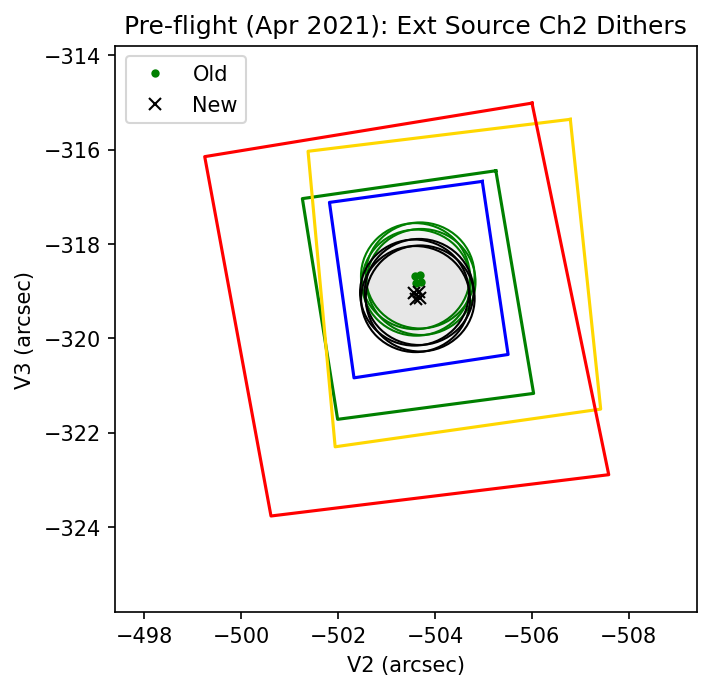

In [27]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()

plt.xlim(-497.4,-509.4)
plt.ylim(-325.8,-313.8)
plt.xlabel('V2 (arcsec)')
plt.ylabel('V3 (arcsec)')

plt.plot(v2_old_ech2,v3_old_ech2,'.',color='g',label='Old')
for i in range(0,v2_old_ech2.size):
    circle1 = mpl.patches.Circle((v2_old_ech2[i], v3_old_ech2[i]), mrsd.maxfwhm(4),linewidth=1,edgecolor='g', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)    

plt.plot(v2_ext_ch2,v3_ext_ch2,'x',color='black',label='New')
for i in range(0,v2_ext_ch2.size):
    circle1 = mpl.patches.Circle((v2_ext_ch2[i], v3_ext_ch2[i]), mrsd.maxfwhm(4),linewidth=1,edgecolor='black', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)

plt.plot(siaf1A['inscr_v2_corners'],siaf1A['inscr_v3_corners'],color='b',linewidth=1.5)
plt.plot(siaf2A['inscr_v2_corners'],siaf2A['inscr_v3_corners'],color='g',linewidth=1.5)
plt.plot(siaf3A['inscr_v2_corners'],siaf3A['inscr_v3_corners'],color='gold',linewidth=1.5)
plt.plot(siaf4A['inscr_v2_corners'],siaf4A['inscr_v3_corners'],color='r',linewidth=1.5)
plt.title('Pre-flight ('+nowstring+'): Ext Source Ch2 Dithers')
plt.legend()

In [28]:
# Test that they didn't change too much
diff = np.sqrt((v2_ext_ch2-v2_old_ech2)**2 + (v3_ext_ch2-v3_old_ech2)**2)
if (np.max(diff) > 0.3):
    printmd('**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?', color="red")
else:
    printmd('**Looks OK!**', color="green")

<span style='color:red'>**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?</span>

### Extended source Ch3 dithers ###

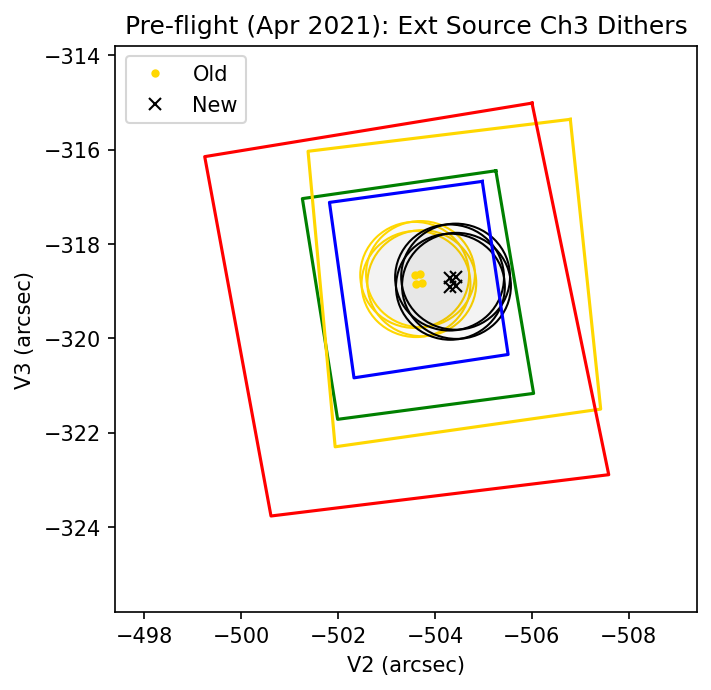

In [29]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()

plt.xlim(-497.4,-509.4)
plt.ylim(-325.8,-313.8)
plt.xlabel('V2 (arcsec)')
plt.ylabel('V3 (arcsec)')

plt.plot(v2_old_ech3,v3_old_ech3,'.',color='gold',label='Old')
for i in range(0,v2_old_ech3.size):
    circle1 = mpl.patches.Circle((v2_old_ech3[i], v3_old_ech3[i]), mrsd.maxfwhm(4),linewidth=1,edgecolor='gold', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)    

plt.plot(v2_ext_ch3,v3_ext_ch3,'x',color='black',label='New')
for i in range(0,v2_ext_ch3.size):
    circle1 = mpl.patches.Circle((v2_ext_ch3[i], v3_ext_ch3[i]), mrsd.maxfwhm(4),linewidth=1,edgecolor='black', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)

plt.plot(siaf1A['inscr_v2_corners'],siaf1A['inscr_v3_corners'],color='b',linewidth=1.5)
plt.plot(siaf2A['inscr_v2_corners'],siaf2A['inscr_v3_corners'],color='g',linewidth=1.5)
plt.plot(siaf3A['inscr_v2_corners'],siaf3A['inscr_v3_corners'],color='gold',linewidth=1.5)
plt.plot(siaf4A['inscr_v2_corners'],siaf4A['inscr_v3_corners'],color='r',linewidth=1.5)
plt.title('Pre-flight ('+nowstring+'): Ext Source Ch3 Dithers')
plt.legend()

In [30]:
# Test that they didn't change too much
diff = np.sqrt((v2_ext_ch3-v2_old_ech3)**2 + (v3_ext_ch3-v3_old_ech3)**2)
if (np.max(diff) > 0.3):
    printmd('**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?', color="red")
else:
    printmd('**Looks OK!**', color="green")

<span style='color:red'>**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?</span>

### Extended source Ch4 dithers ###

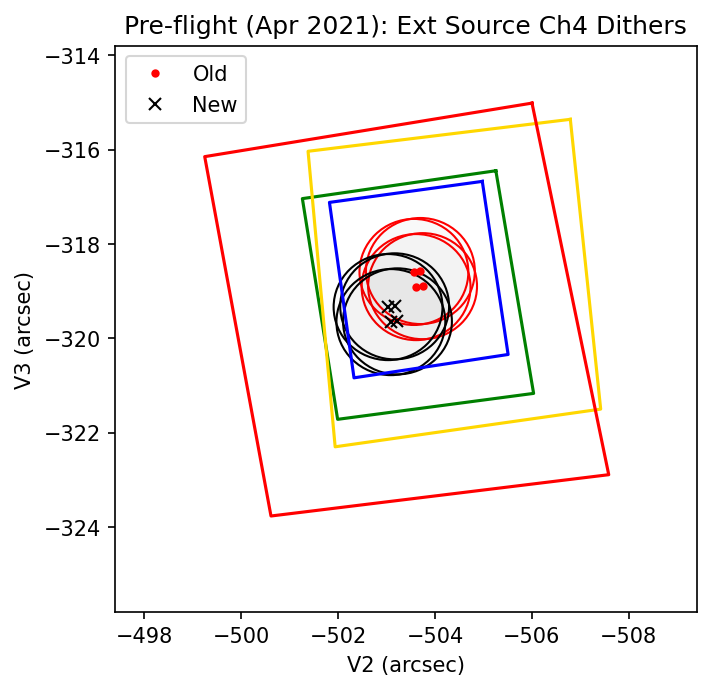

In [31]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()

plt.xlim(-497.4,-509.4)
plt.ylim(-325.8,-313.8)
plt.xlabel('V2 (arcsec)')
plt.ylabel('V3 (arcsec)')

plt.plot(v2_old_ech4,v3_old_ech4,'.',color='r',label='Old')
for i in range(0,v2_old_ech4.size):
    circle1 = mpl.patches.Circle((v2_old_ech4[i], v3_old_ech4[i]), mrsd.maxfwhm(4),linewidth=1,edgecolor='r', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)    

plt.plot(v2_ext_ch4,v3_ext_ch4,'x',color='black',label='New')
for i in range(0,v2_ext_ch4.size):
    circle1 = mpl.patches.Circle((v2_ext_ch4[i], v3_ext_ch4[i]), mrsd.maxfwhm(4),linewidth=1,edgecolor='black', facecolor=(0, 0, 0, .0125))
    ax.add_artist(circle1)

plt.plot(siaf1A['inscr_v2_corners'],siaf1A['inscr_v3_corners'],color='b',linewidth=1.5)
plt.plot(siaf2A['inscr_v2_corners'],siaf2A['inscr_v3_corners'],color='g',linewidth=1.5)
plt.plot(siaf3A['inscr_v2_corners'],siaf3A['inscr_v3_corners'],color='gold',linewidth=1.5)
plt.plot(siaf4A['inscr_v2_corners'],siaf4A['inscr_v3_corners'],color='r',linewidth=1.5)
plt.title('Pre-flight ('+nowstring+'): Ext Source Ch4 Dithers')
plt.legend()

In [32]:
# Test that they didn't change too much
diff = np.sqrt((v2_ext_ch4-v2_old_ech4)**2 + (v3_ext_ch4-v3_old_ech4)**2)
if (np.max(diff) > 0.3):
    printmd('**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?', color="red")
else:
    printmd('**Looks OK!**', color="green")

<span style='color:red'>**WARNING**: Dithers have changed by > 0.3 arcsec, are you sure this was intentional?</span>

### Put all of the patterns together and compute Ideal frame offsets ###

In [33]:
# So far each of these gave specific v2/v3 pointing locations.
# Now they need to be converted to xidl, yidl offsets relative to the pointing origin for a given dither pattern
# (i.e., where the undithered pointing is for a given channel)
# Note that this means the offsets (wrt A band) won't necessarily be symmetric around 0 xideal/yideal because
# they average over the FoV of bands A/B/C together.

In [34]:
# Positions index
index=np.arange(52)+1

# Ch1 point source pattern
v2_all,v3_all=v2_ch1,v3_ch1
ch_all=(np.ones(len(v2_ch1))).astype(int)
dx,dy=mrsd.compute_dxdyideal(v2_ch1,v3_ch1,siaf1A,siaf1A=siaf1A)
dx_all,dy_all=dx,dy
# Ch2 point source pattern
v2_all,v3_all=np.append(v2_all,v2_ch2),np.append(v3_all,v3_ch2)
ch_all=np.append(ch_all,(np.ones(len(v2_ch2))*2).astype(int))
dx,dy=mrsd.compute_dxdyideal(v2_ch2,v3_ch2,siaf2A,siaf1A=siaf1A)
dx_all,dy_all=np.append(dx_all,dx),np.append(dy_all,dy)
# Ch3 point source pattern
v2_all,v3_all=np.append(v2_all,v2_ch3),np.append(v3_all,v3_ch3)
ch_all=np.append(ch_all,(np.ones(len(v2_ch3))*3).astype(int))
dx,dy=mrsd.compute_dxdyideal(v2_ch3,v3_ch3,siaf3A,siaf1A=siaf1A)
dx_all,dy_all=np.append(dx_all,dx),np.append(dy_all,dy)
# Ch4 point source pattern
v2_all,v3_all=np.append(v2_all,v2_ch4),np.append(v3_all,v3_ch4)
ch_all=np.append(ch_all,(np.ones(len(v2_ch4))*4).astype(int))
dx,dy=mrsd.compute_dxdyideal(v2_ch4,v3_ch4,siaf4A,siaf1A=siaf1A)
dx_all,dy_all=np.append(dx_all,dx),np.append(dy_all,dy)

# Extended source ALL pattern
v2_all,v3_all=np.append(v2_all,v2_ext_all),np.append(v3_all,v3_ext_all)
ch_all=np.append(ch_all,(np.ones(len(v2_ext_all))).astype(int))
dx,dy=mrsd.compute_dxdyideal(v2_ext_all,v3_ext_all,siaf1A,siaf1A=siaf1A)
dx_all,dy_all=np.append(dx_all,dx),np.append(dy_all,dy)
# Extended source Ch1 pattern
v2_all,v3_all=np.append(v2_all,v2_ext_ch1),np.append(v3_all,v3_ext_ch1)
ch_all=np.append(ch_all,(np.ones(len(v2_ext_ch1))).astype(int))
dx,dy=mrsd.compute_dxdyideal(v2_ext_ch1,v3_ext_ch1,siaf1A,siaf1A=siaf1A)
dx_all,dy_all=np.append(dx_all,dx),np.append(dy_all,dy)
# Extended source Ch2 pattern
v2_all,v3_all=np.append(v2_all,v2_ext_ch2),np.append(v3_all,v3_ext_ch2)
ch_all=np.append(ch_all,(np.ones(len(v2_ext_ch2))*2).astype(int))
dx,dy=mrsd.compute_dxdyideal(v2_ext_ch2,v3_ext_ch2,siaf2A,siaf1A=siaf1A)
dx_all,dy_all=np.append(dx_all,dx),np.append(dy_all,dy)
# Extended source Ch3 pattern
v2_all,v3_all=np.append(v2_all,v2_ext_ch3),np.append(v3_all,v3_ext_ch3)
ch_all=np.append(ch_all,(np.ones(len(v2_ext_ch3))*3).astype(int))
dx,dy=mrsd.compute_dxdyideal(v2_ext_ch3,v3_ext_ch3,siaf3A,siaf1A=siaf1A)
dx_all,dy_all=np.append(dx_all,dx),np.append(dy_all,dy)
# Extended source Ch4 pattern
v2_all,v3_all=np.append(v2_all,v2_ext_ch4),np.append(v3_all,v3_ext_ch4)
ch_all=np.append(ch_all,(np.ones(len(v2_ext_ch4))*4).astype(int))
dx,dy=mrsd.compute_dxdyideal(v2_ext_ch4,v3_ext_ch4,siaf4A,siaf1A=siaf1A)
dx_all,dy_all=np.append(dx_all,dx),np.append(dy_all,dy)

### Generate QA plots for JDox ###

In [35]:
allsiaf=[siaf1A,siaf1B,siaf1C,siaf2A,siaf2B,siaf2C,siaf3A,siaf3B,siaf3C,siaf4A,siaf4B,siaf4C]

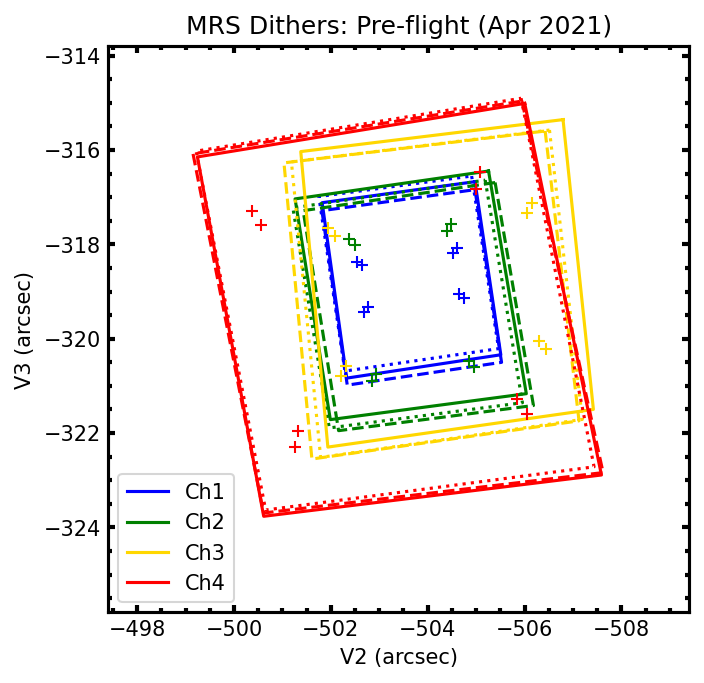

In [36]:
mrsd.qaplot_ptsourceloc(v2_all,v3_all,allsiaf,outdir=data_dir)

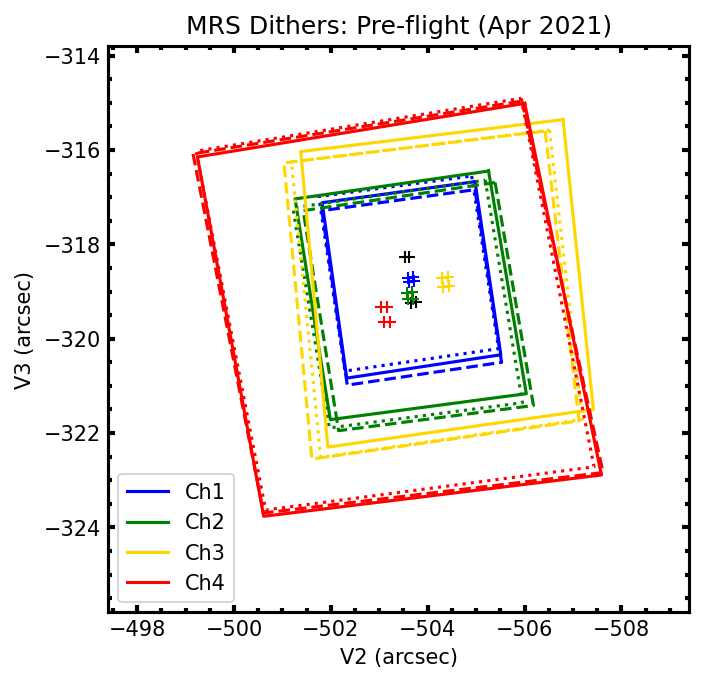

In [37]:
mrsd.qaplot_extsourceloc(v2_all,v3_all,allsiaf,outdir=data_dir)

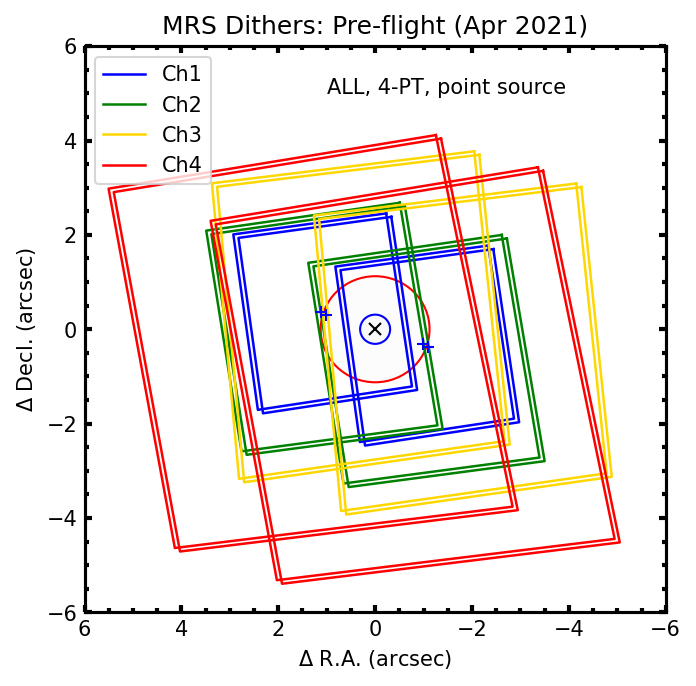

In [38]:
mrsd.qaplot_ps4all(v2_all,v3_all,dx_all,dy_all,allsiaf,outdir=data_dir)

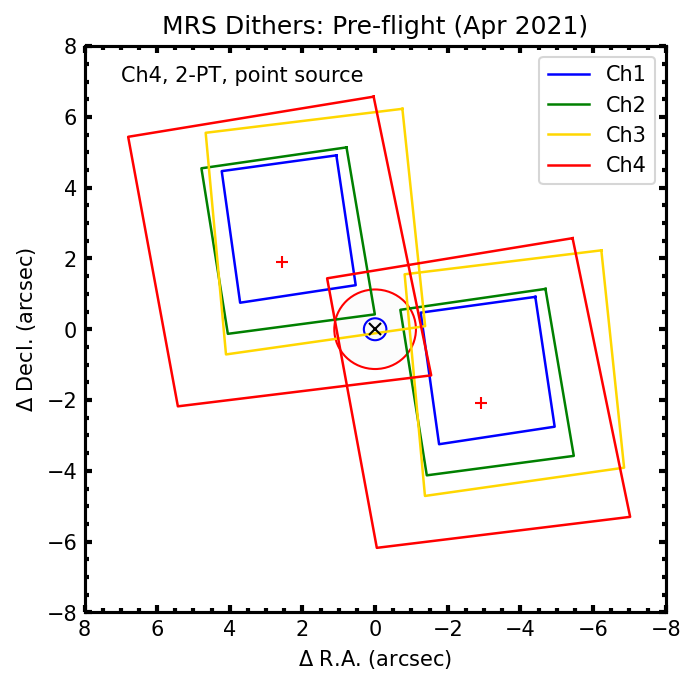

In [39]:
mrsd.qaplot_ps2ch4(v2_all,v3_all,dx_all,dy_all,allsiaf,outdir=data_dir)

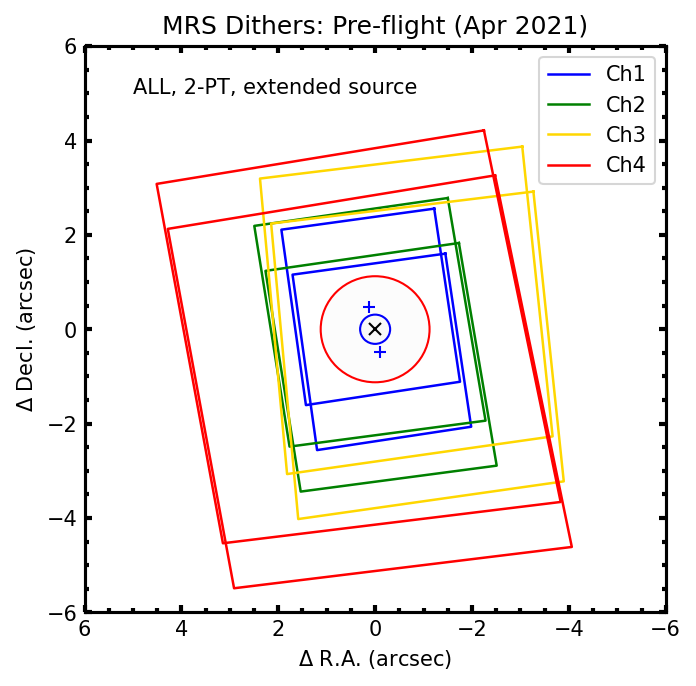

In [40]:
mrsd.qaplot_ext2all(v2_all,v3_all,dx_all,dy_all,allsiaf,outdir=data_dir)

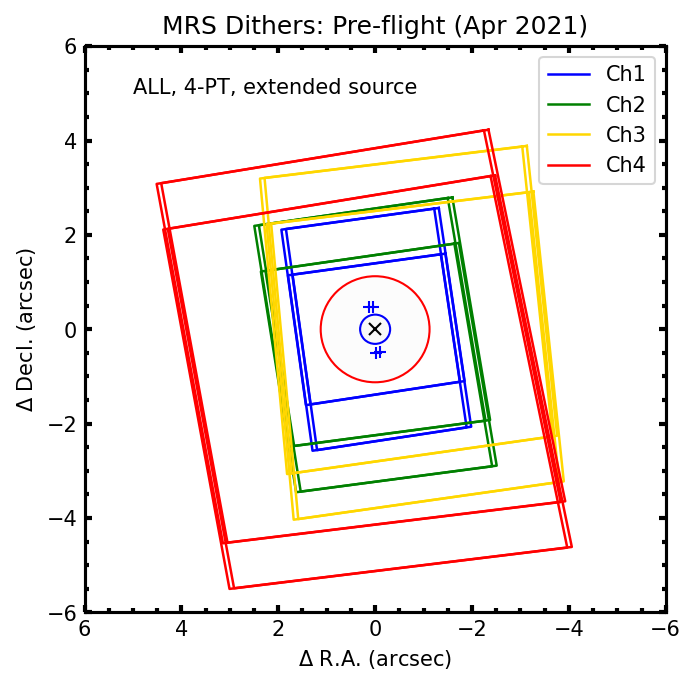

In [41]:
mrsd.qaplot_ext4all(v2_all,v3_all,dx_all,dy_all,allsiaf,outdir=data_dir)

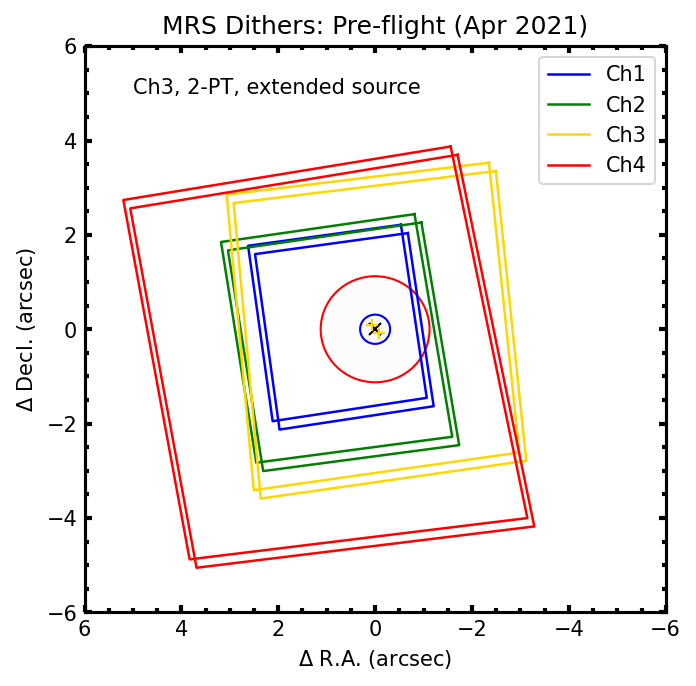

In [42]:
mrsd.qaplot_ext2ch3(v2_all,v3_all,dx_all,dy_all,allsiaf,outdir=data_dir)

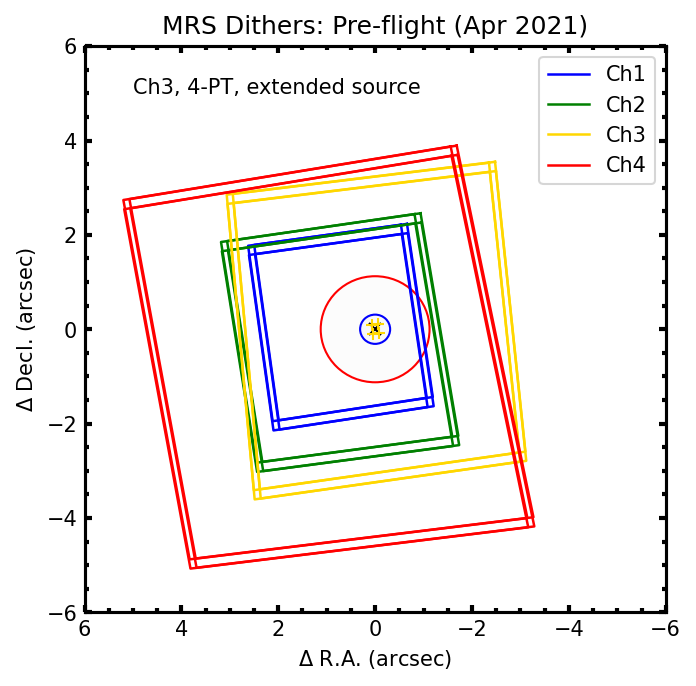

In [43]:
mrsd.qaplot_ext4ch3(v2_all,v3_all,dx_all,dy_all,allsiaf,outdir=data_dir)

### Write results to disk ###

In [44]:
mrsd.writeresults_mirisim(ch_all,v2_all,v3_all,outdir=data_dir)
mrsd.writeresults_prd(dx_all,dy_all,outdir=data_dir)
mrsd.writeresults_full(index,ch_all,v2_all,v3_all,dx_all,dy_all,outdir=data_dir)

Successfully wrote mirisim dithers file to  mrs_recommended_dither.dat
Successfully wrote PRD dithers file to  MiriMrsDithers.txt
Successfully wrote full dithers file to  mrs_dithers.txt


### About this notebook ###
**Author**: David Law, AURA Associate Astronomer, MIRI branch
<br>
**Updated On**: 04/09/2021


<img style="float: center;" src="./stsci_logo.png" alt="stsci_logo" width="200px"/> 